#### CSC 180 Intelligent Systems 

#### William Lorence, Ajaydeep Singh, Romin Akoliya, Abdurraziq Paikur

#### California State University, Sacramento

# Project 3: House Price Prediction using TensorFlow Functional API
### Creating the data table

In [108]:
metadata_path = "./dataset/HousesInfo.txt"

In [129]:
import seaborn as sns
import os
import pandas as pd

import csv
import numpy as np

import cv2
import glob
from IPython.display import Image

# Load the metadata file into a DataFrame
df = pd.read_csv(metadata_path, sep=" ", header=None, 
                 names=['bedrooms', 'bathrooms', 'area', 'zipcode', 'price'])

# Display the first few rows to verify the data is loaded correctly
print(df.shape)
df.head()


(535, 5)


,bedrooms,bathrooms,area,zipcode,price
0,4,4.0,4053,85255,869500
1,4,3.0,3343,36372,865200
2,3,4.0,3923,85266,889000
3,5,5.0,4022,85262,910000
4,3,4.0,4116,85266,971226


### Removing outliers (10 pts)

In [131]:
# Filter houses with prices between 100K and 900K
df_filtered = df[(df['price'] >= 100000) & (df['price'] <= 900000)]

#Removes the one house with zipcode 3XXXX
df_filtered = df_filtered[(df['zipcode'] >= 40000)]

#Removes houses with more than 5 bathrooms
df_filtered = df_filtered[(df['bathrooms'] <= 5)]

#Removes houses with more than 5 bedrooms
df_filtered = df_filtered[(df['bedrooms'] <= 5)]

print(df_filtered.shape)
df_filtered.head()

#143 houses removed


(392, 5)


C:\Users\legow\AppData\Local\Temp\ipykernel_25748\26002699.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtered = df_filtered[(df['zipcode'] >= 40000)]
C:\Users\legow\AppData\Local\Temp\ipykernel_25748\26002699.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtered = df_filtered[(df['bathrooms'] <= 5)]
C:\Users\legow\AppData\Local\Temp\ipykernel_25748\26002699.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtered = df_filtered[(df['bedrooms'] <= 5)]


,bedrooms,bathrooms,area,zipcode,price
0,4,4.0,4053,85255,869500
2,3,4.0,3923,85266,889000
6,3,4.0,2544,85262,799000
10,5,5.0,4829,85266,519200
12,5,3.0,5462,85266,799000


### Handling the images dataset

In [132]:
print(df_filtered.index)

Index([  0,   2,   6,  10,  12,  13,  14,  15,  16,  17,
       ...
       525, 526, 527, 528, 529, 530, 531, 532, 533, 534],
      dtype='int64', length=392)


In [133]:
image_folder = "./dataset"

## Bathroom.jpg
bathroom_images = []
for index in df_filtered.index:
    if os.path.isfile("./dataset/" + str(index+1) + "_bathroom.jpg"):
        bathroom_images.append("./dataset/" + str(index+1) + "_bathroom.jpg")
img=pd.DataFrame(bathroom_images,columns=['bathroom_img'])

## Bedroom.jpg
bedroom_images = []
for index in df_filtered.index:
    if os.path.isfile("./dataset/" + str(index+1) + "_bedroom.jpg"):
        bedroom_images.append("./dataset/" + str(index+1) + "_bedroom.jpg")
img['bedroom_img']=bedroom_images

## Frontal.jpg
frontal_images = []
for index in df_filtered.index:
    if os.path.isfile("./dataset/" + str(index+1) + "_frontal.jpg"):
        frontal_images.append("./dataset/" + str(index+1) + "_frontal.jpg")
img['frontal_img']=frontal_images

## Kitchen.jpg
kitchen_images = []
for index in df_filtered.index:
    if os.path.isfile("./dataset/" + str(index+1) + "_kitchen.jpg"):
        kitchen_images.append("./dataset/" + str(index+1) + "_kitchen.jpg")
img['kitchen_img']=kitchen_images

print(img.shape)
img.head()

(392, 4)


,bathroom_img,bedroom_img,frontal_img,kitchen_img
0,./dataset/1_bathroom.jpg,./dataset/1_bedroom.jpg,./dataset/1_frontal.jpg,./dataset/1_kitchen.jpg
1,./dataset/3_bathroom.jpg,./dataset/3_bedroom.jpg,./dataset/3_frontal.jpg,./dataset/3_kitchen.jpg
2,./dataset/7_bathroom.jpg,./dataset/7_bedroom.jpg,./dataset/7_frontal.jpg,./dataset/7_kitchen.jpg
3,./dataset/11_bathroom.jpg,./dataset/11_bedroom.jpg,./dataset/11_frontal.jpg,./dataset/11_kitchen.jpg
4,./dataset/13_bathroom.jpg,./dataset/13_bedroom.jpg,./dataset/13_frontal.jpg,./dataset/13_kitchen.jpg


### Concatenate the images into one image for each house

In [134]:
images_output=[]
for row_index,row in img.iterrows():
            inputImages=[]
            outputImage = np.zeros((128, 128, 3), dtype="uint8")
            image_temp1 = cv2.imread(row.bathroom_img)
            image1 = cv2.resize(image_temp1, (64 , 64))
            
            image_temp2 = cv2.imread(row.bedroom_img)
            image2 = cv2.resize(image_temp2, (64 , 64))
            
            image_temp3 = cv2.imread(row.frontal_img)
            image3 = cv2.resize(image_temp3, (64 , 64))
            
            image_temp4 = cv2.imread(row.kitchen_img)
            image4 = cv2.resize(image_temp4, (64 , 64))
              
            inputImages.append(image1)
            inputImages.append(image2)
            inputImages.append(image3)
            inputImages.append(image4)
            
            outputImage[0:64, 0:64] = inputImages[0]
            outputImage[0:64, 64:128] = inputImages[1]
            outputImage[64:128, 64:128] = inputImages[2]
            outputImage[64:128, 0:64] = inputImages[3]
            
        
            images_output.append(outputImage)
print(len(images_output))

392


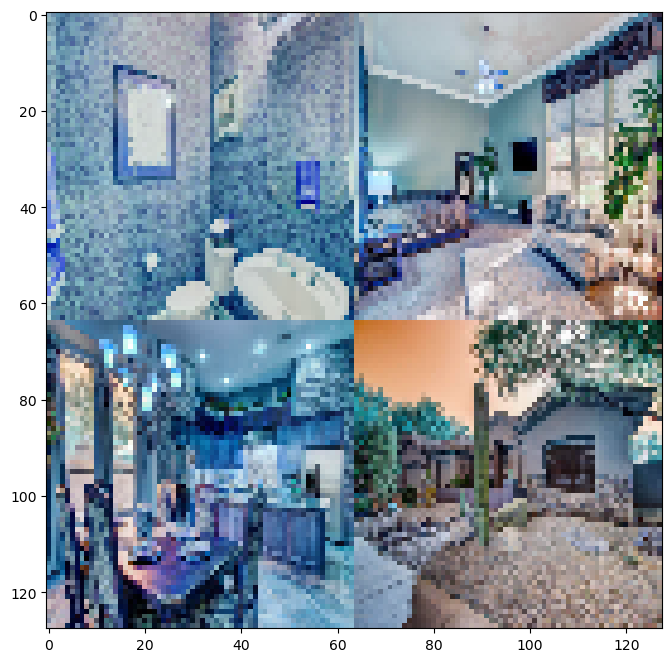

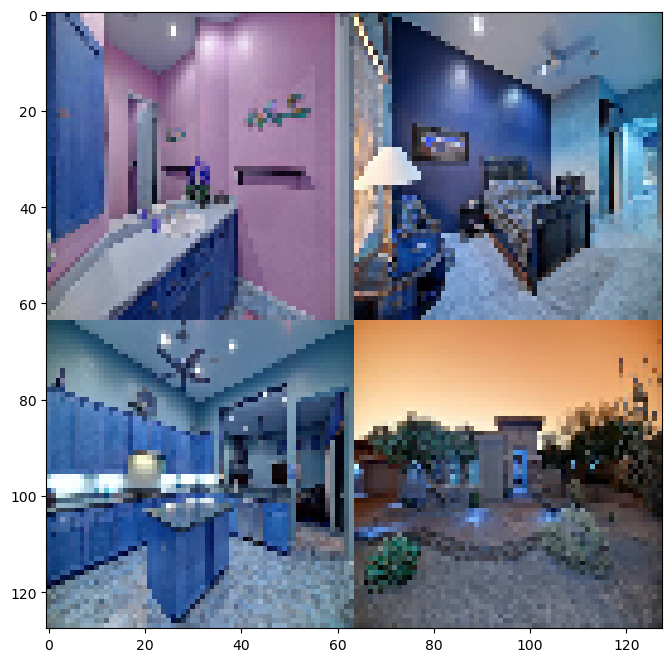

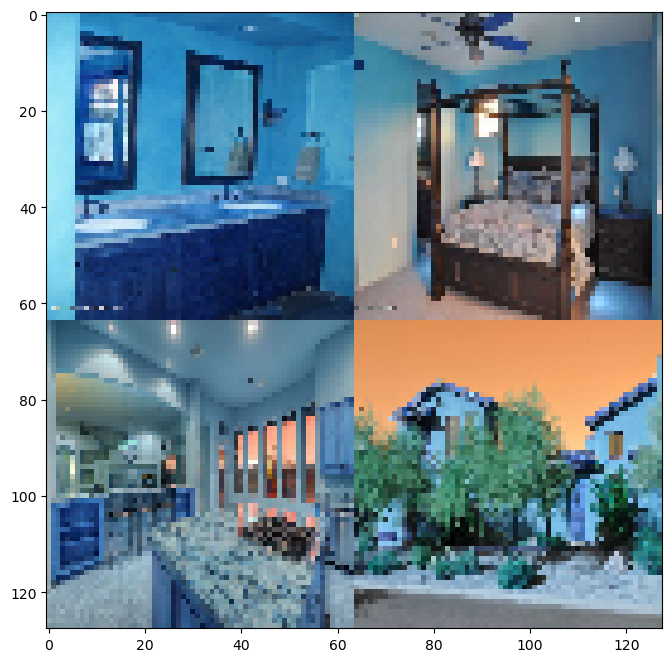

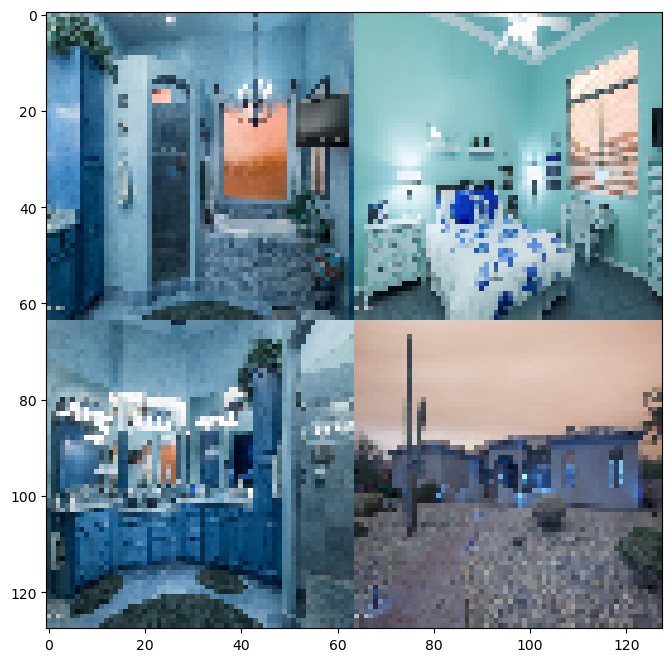

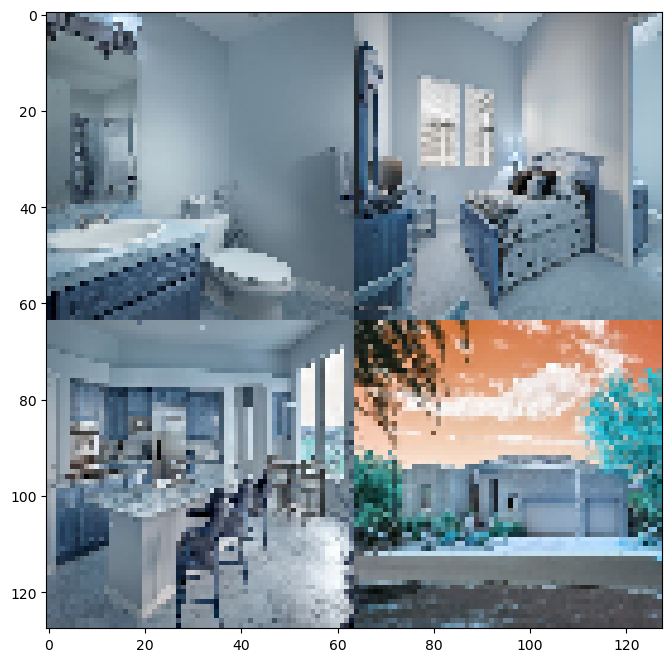

In [135]:
import matplotlib.pyplot as plt

#Prints the first 5 concatenated images as a test
c = 0
for i in images_output:
     if c < 5:
          plt.figure(figsize=(8,8))
          plt.imshow(i, interpolation='nearest')
          plt.show()
          c += 1

### Create numpy array of images

In [136]:
img_arr=np.asarray(images_output)
img_arr.shape

(392, 128, 128, 3)

### Encode Categorical Features and Normalize Numeric Features (10 pts)

In [138]:
#Apply normalization to the numerical columns
z_columns = ['bedrooms', 'bathrooms', 'area', 'price']

from scipy.stats import zscore

def z_score_numerical(df, names):
    for name in names:
        z_col = zscore(df[name])
        
        for index in df.index:
            new_value = z_col[index]
            df.loc[index, name] = new_value
        
z_score_numerical(df_filtered, z_columns)

df_filtered.head()

,bedrooms,bathrooms,area,zipcode,price
0,0.730929,1.843249,1.623545,85255,1.809635
2,-0.322469,1.843249,1.507104,85266,1.899797
6,-0.322469,1.843249,0.271930,85262,1.483664
10,1.784327,3.075749,2.318610,85266,0.189951
12,1.784327,0.610748,2.885589,85266,1.483664


In [139]:
import math

def first_two_digits(num):
    return num // 10 ** (int(math.log(num, 10)) - 1)

#Shorten zipcode to the first digit (general area of the U.S.)
zipcode_first_digit = df_filtered['zipcode'].apply(first_two_digits)

for index in df_filtered.index:
    new_value = zipcode_first_digit[index]
    df_filtered.loc[index, 'zipcode'] = new_value

df_filtered.head()


,bedrooms,bathrooms,area,zipcode,price
0,0.730929,1.843249,1.623545,85,1.809635
2,-0.322469,1.843249,1.507104,85,1.899797
6,-0.322469,1.843249,0.271930,85,1.483664
10,1.784327,3.075749,2.318610,85,0.189951
12,1.784327,0.610748,2.885589,85,1.483664


In [140]:
hot_encode_columns = ['zipcode']

def encode_text_dummy_loop(df, names):
    for name in names:
        dummies = pd.get_dummies(df[name])
        for x in dummies.columns:
            dummy_name = "{}-{}".format(name, x)
            df[dummy_name] = dummies[x]
        df.drop(name, axis=1, inplace=True)

encode_text_dummy_loop(df_filtered, hot_encode_columns)

df_filtered.head()

,bedrooms,bathrooms,area,price,zipcode-60,zipcode-62,zipcode-81,zipcode-85,zipcode-91,zipcode-92,zipcode-93,zipcode-94,zipcode-95,zipcode-96,zipcode-98
0,0.730929,1.843249,1.623545,1.809635,False,False,False,True,False,False,False,False,False,False,False
2,-0.322469,1.843249,1.507104,1.899797,False,False,False,True,False,False,False,False,False,False,False
6,-0.322469,1.843249,0.271930,1.483664,False,False,False,True,False,False,False,False,False,False,False
10,1.784327,3.075749,2.318610,0.189951,False,False,False,True,False,False,False,False,False,False,False
12,1.784327,0.610748,2.885589,1.483664,False,False,False,True,False,False,False,False,False,False,False


In [141]:
# Apply the transformation to the dataset
X = df_filtered.drop('price', axis=1)
y = df_filtered['price']


### Split Data for Training and Testing (5 pts)

In [142]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the resulting datasets
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")


X_train shape: (313, 14), X_test shape: (79, 14)
y_train shape: (313,), y_test shape: (79,)


### Extract Textual Features Using Dense Layers (20 pts)

In [34]:

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Define the input shape based on the number of features in X_train
input_shape = X_train.shape[1]

# Create the input layer for textual features
textual_input = Input(shape=(input_shape,), name='textual_input')

# Create dense layers to extract textual features
x = Dense(64, activation='relu')(textual_input)
x = Dense(32, activation='relu')(x)
textual_features = Dense(16, activation='relu', name='textual_features')(x)

# Define the textual model
textual_model = Model(inputs=textual_input, outputs=textual_features)

# Print the model summary
textual_model.summary()




Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ textual_input (InputLayer)           │ (None, 43)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           2,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ textual_features (Dense)             │ (None, 16)                  │             528 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,424 (21.19 KB)

 Trainable params: 5,424 (21.19 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


In [28]:
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test),
                    epochs=100, 
                    batch_size=32,
                    callbacks=[early_stopping])


Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 280380997632.0000 - val_loss: 281624936448.0000
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 274780995584.0000 - val_loss: 281624543232.0000
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 281925189632.0000 - val_loss: 281623986176.0000
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 293482037248.0000 - val_loss: 281623003136.0000
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 283248066560.0000 - val_loss: 281621364736.0000
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 269406109696.0000 - val_loss: 281618677760.0000
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 268310462464.0000 - val_loss: 281614417920.0000
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 279039442944.0000 - val_loss: 281607733248.0000
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 281297879040.0000 - val_loss: 281597837312.0000
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━

In [29]:
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {test_loss}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 50252730368.0000  
Test Loss (MSE): 55057707008.0


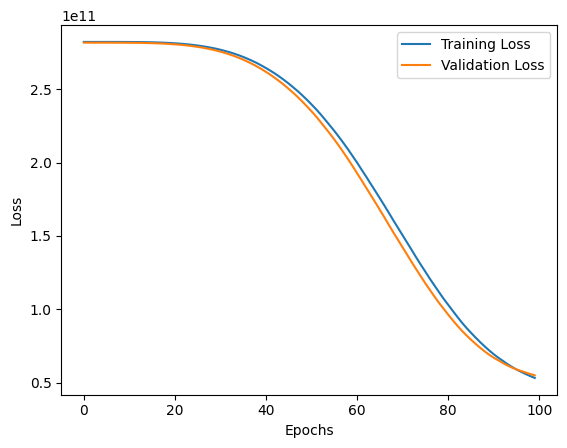

In [30]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [31]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Square Error (RMSE): {rmse}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Root Mean Square Error (RMSE): 234643.7939059354


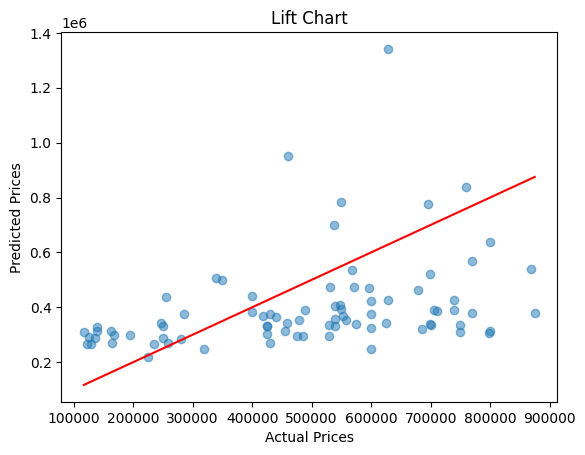

In [32]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Ideal line
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Lift Chart')
plt.show()
